In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [98]:
iris_data = load_iris()

iris = pd.DataFrame(columns= iris_data.feature_names, data= iris_data.data)
target_df = pd.DataFrame(columns= ['species'], data= iris_data.target)
iris = pd.concat([iris, target_df], axis= 1)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


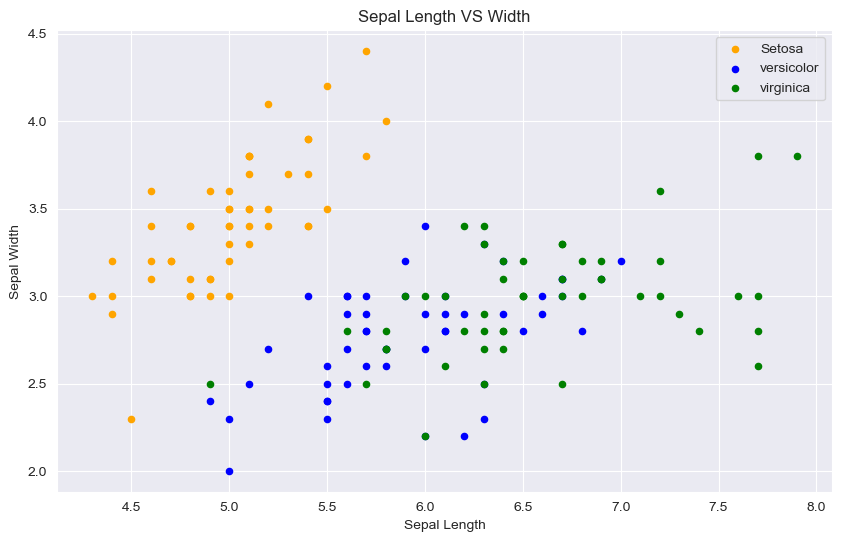

In [101]:
fig = iris[iris["species"] == 0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange', label='Setosa')
iris[iris["species"] == 1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='blue', label='versicolor',ax=fig)
iris[iris["species"] == 2].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

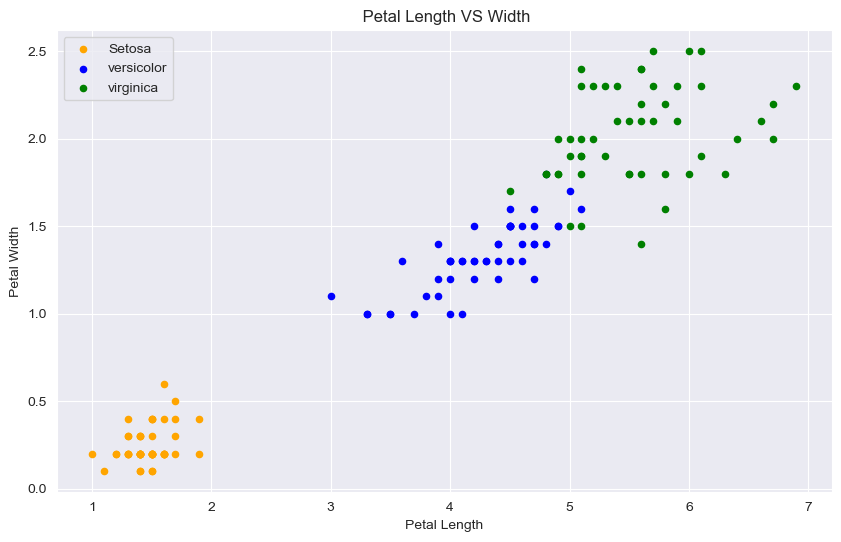

In [103]:
fig = iris[iris["species"] == 0].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='orange', label='Setosa')
iris[iris["species"] == 1].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='blue', label='versicolor',ax=fig)
iris[iris["species"] == 2].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


As we can see, the petal feature is more useful than the sepal feature for classification of the iris flowers.

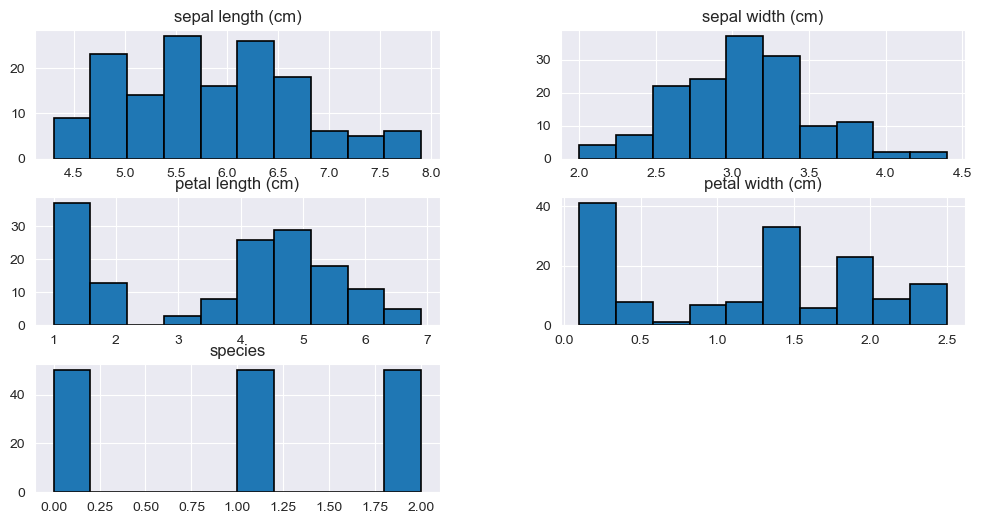

In [104]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='species', ylabel='sepal width (cm)'>

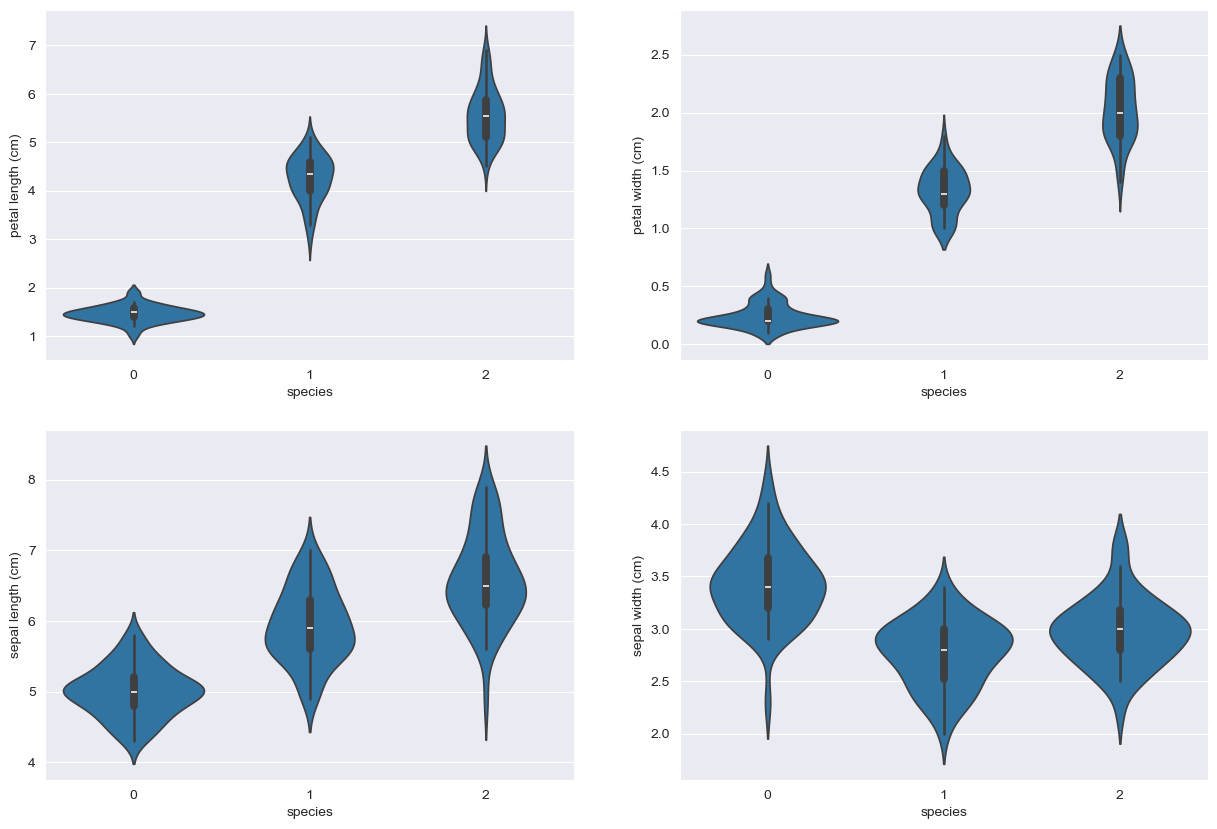

In [106]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal length (cm)',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width (cm)',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal length (cm)',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width (cm)',data=iris)

The problem is a classification problem. Thus we will be using the classification algorithms to train our model.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [108]:
iris.shape

(150, 5)

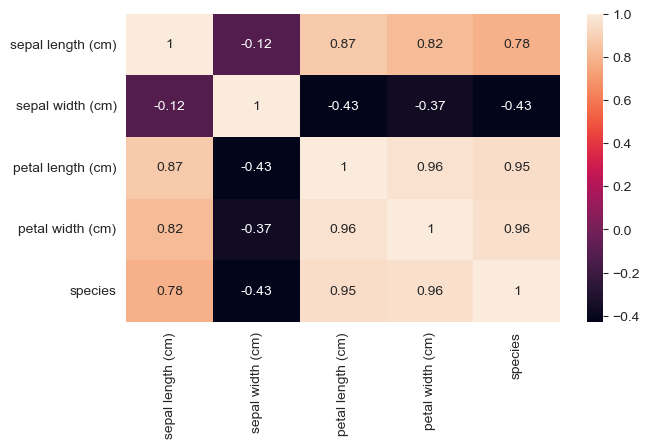

In [109]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot = True)
plt.show()

We observe that the Sepal Width and Length are not correlated while the Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus, we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [121]:
train, test = train_test_split(iris, train_size=0.3)
print(train.shape)
print(test.shape)

(45, 5)
(105, 5)


In [122]:
train_X = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
train_y = train.species
test_X = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
test_y = test.species

In [123]:
train_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
97,6.2,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3
28,5.2,3.4,1.4,0.2
42,4.4,3.2,1.3,0.2


In [124]:
train_y.head()

132    2
97     1
143    2
28     0
42     0
Name: species, dtype: int64

In [125]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is: 0.9523809523809523


In [126]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is 0.9523809523809523


In [127]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is 0.9428571428571428


In [128]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9714285714285714


([<matplotlib.axis.XTick at 0x16c7ac680>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

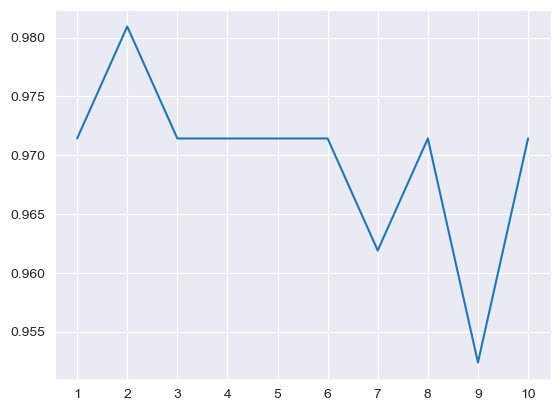

In [137]:
a_index = list(range(1,11))
a = []
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [138]:
petal = iris[['petal length (cm)', 'petal width (cm)', 'species']]
sepal = iris[['sepal length (cm)', 'sepal width (cm)', 'species']]

In [139]:
train_p, test_p = train_test_split(petal, test_size = 0.3, random_state = 0)
train_x_p = train_p[['petal length (cm)', 'petal width (cm)']]
train_y_p = train_p.species
test_x_p = test_p[['petal length (cm)', 'petal width (cm)']]
test_y_p = test_p.species

train_s, test_s = train_test_split(sepal, test_size = 0.3, random_state = 0)
train_x_s = train_s[['sepal length (cm)', 'sepal width (cm)']]
train_y_s = train_s.species
test_x_s = test_s[['sepal length (cm)', 'sepal width (cm)']]
test_y_s = test_s.species

In [140]:
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = svm.SVC()
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [142]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = LogisticRegression()
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [143]:
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = DecisionTreeClassifier()
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [144]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:', metrics.accuracy_score(prediction, test_y_p))

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


Observations:
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.